In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import jedi
%matplotlib inline

In [105]:
def read_temper(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)
    
    all_energy_list = []
    for i in range(n):
        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file).assign(Run = i)
        energy.columns = energy.columns.str.strip()
        energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
        all_energy_list.append(energy)
    energy = pd.concat(all_energy_list)
    
    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log0/log.lammps"
#     file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t5.assign(TotalE = t5.Energy + t5.Lipid)
    t6 = t5.assign(TotalE_perturb_mem_p = t5.TotalE + 0.05*t5.Membrane)
    t6 = t6.assign(TotalE_perturb_mem_m = t6.TotalE - 0.05*t6.Membrane)
    t6 = t6.assign(TotalE_perturb_lipid_p = t6.TotalE + 0.05*t6.Lipid)
    t6 = t6.assign(TotalE_perturb_lipid_m = t6.TotalE - 0.05*t6.Lipid)
    return t6

In [106]:
folder_list = [
   '/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/',
    '/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_topology/'
]
dis_list = np.linspace(30, 130, 51)
# dis_list = np.linspace(132, 232, 51)
# dis_list = [30.0]
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        print(dis)
        location = folder + "/simulation/dis_{}/0/".format(dis)
        data = read_temper(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
#             tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp = data.query('Temp=="{}"'.format(temp))
            tmp.to_csv(location+"t{}_new.dat".format(dic[temp]), sep=' ', index=False, header=False)

30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0


In [4]:
import subprocess

In [13]:
a = subprocess.Popen('grep "std" temper_oct24.ipynb',stdout=subprocess.PIPE,shell=True).communicate()[0].decode()

In [14]:
print(a)

     "name": "stdout",
       "'     \"name\": \"stdout\",\\n'"
    "subprocess.Popen('grep \"std\" temper_oct24.ipynb',stdout=subprocess.PIPE,shell=True).communicate()[0].decode()"
     "name": "stdout",



In [34]:
location = folder + "/simulation/dis_{}/0/".format(30.0)
n=12
all_lipid_list = []
for i in range(n):
    file = "lipid.{}.dat".format(i)
    lipid = pd.read_csv(location+file).assign(Run = i)
    lipid.columns = lipid.columns.str.strip()
    lipid = lipid[["Steps","Lipid","Run"]]
    all_lipid_list.append(lipid)
lipid = pd.concat(all_lipid_list)

all_energy_list = []
for i in range(n):
    file = "energy.{}.dat".format(i)
    energy = pd.read_csv(location+file).assign(Run = i)
    energy.columns = energy.columns.str.strip()
    energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
    all_energy_list.append(energy)
energy = pd.concat(all_energy_list)

all_dis_list = []
for i in range(n):
    file = "addforce.{}.dat".format(i)
    dis = pd.read_csv(location+file).assign(Run = i)
    dis.columns = dis.columns.str.strip()
    remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
    dis.drop(remove_columns, axis=1,inplace=True)
    all_dis_list.append(dis)
dis = pd.concat(all_dis_list)

all_wham_list = []
for i in range(n):
    file = "wham.{}.dat".format(i)
    wham = pd.read_csv(location+file).assign(Run = i)
    wham.columns = wham.columns.str.strip()
    remove_columns = ['Rg', 'Tc']
    wham = wham.drop(remove_columns, axis=1)
    all_wham_list.append(wham)
wham = pd.concat(all_wham_list)

file = "../log.lammps"
temper = pd.read_table(location+file, skiprows=2, sep=' ')
temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
temper["Run"] = temper["Run"].str[1:].astype(int)
temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t5.assign(TotalE = t5.Energy + t5.Lipid)
    t6 = t5.assign(TotalE_perturb = t5.TotalE + 0.1*t5.Membrane)

In [48]:
location = "/Users/weilu/Research/server/oct_2017/23oct/memb_3_rg_0.1_lipid_1_extended/1d_dis/t_all/force_0.0/evpb-500.dat"

In [81]:
%matplotlib inline

(-60, 20)

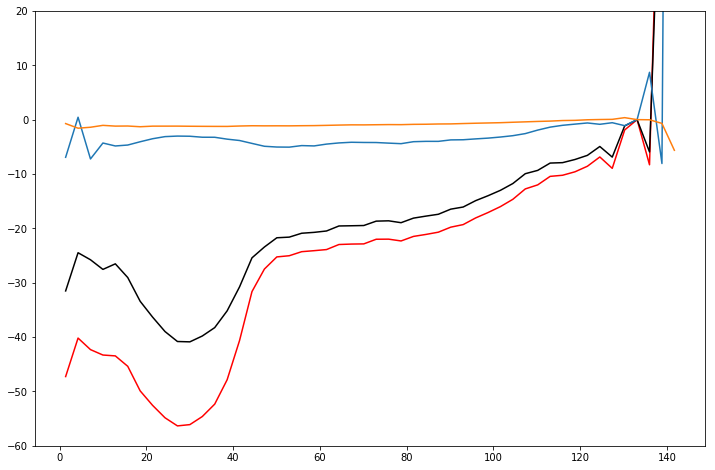

In [96]:
plt.figure(figsize=(12, 8))
num = 4
plt.plot(data[:,1], data[:,2] - data[:,2][-num] + data[:,3] - data[:,3][-num], c="red")
plt.plot(data[:,1], data[:,3] - data[:,3][-num], c="black")
plt.plot(data[:,1], data[:,4] - data[:,4][-num])
plt.plot(data[:,1], data[:,5] - data[:,5][-num])
plt.ylim(-60, 20)